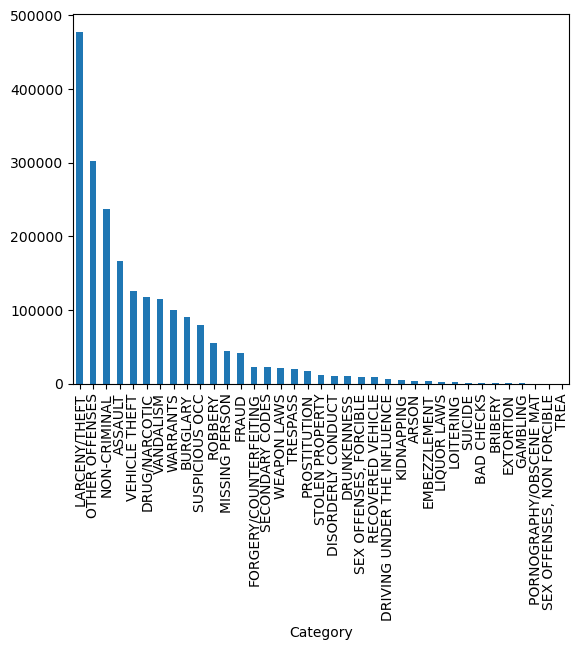

Year 2015 with 151459 occurrences
Year 2011 with 126713 occurrences


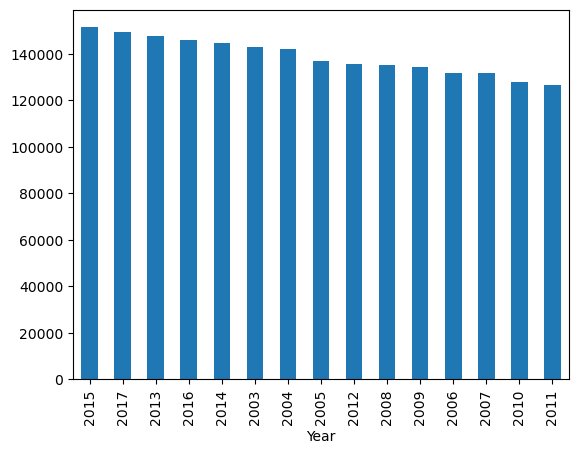

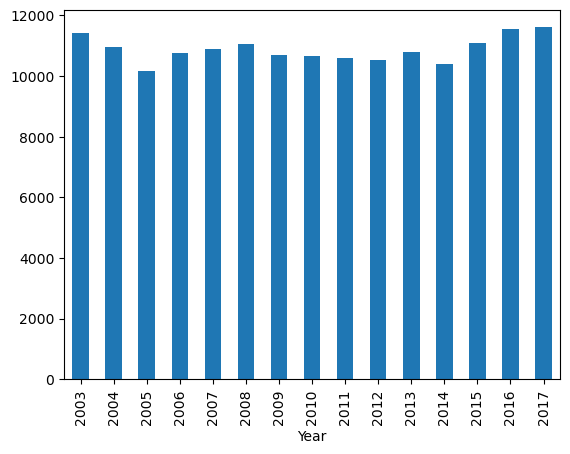

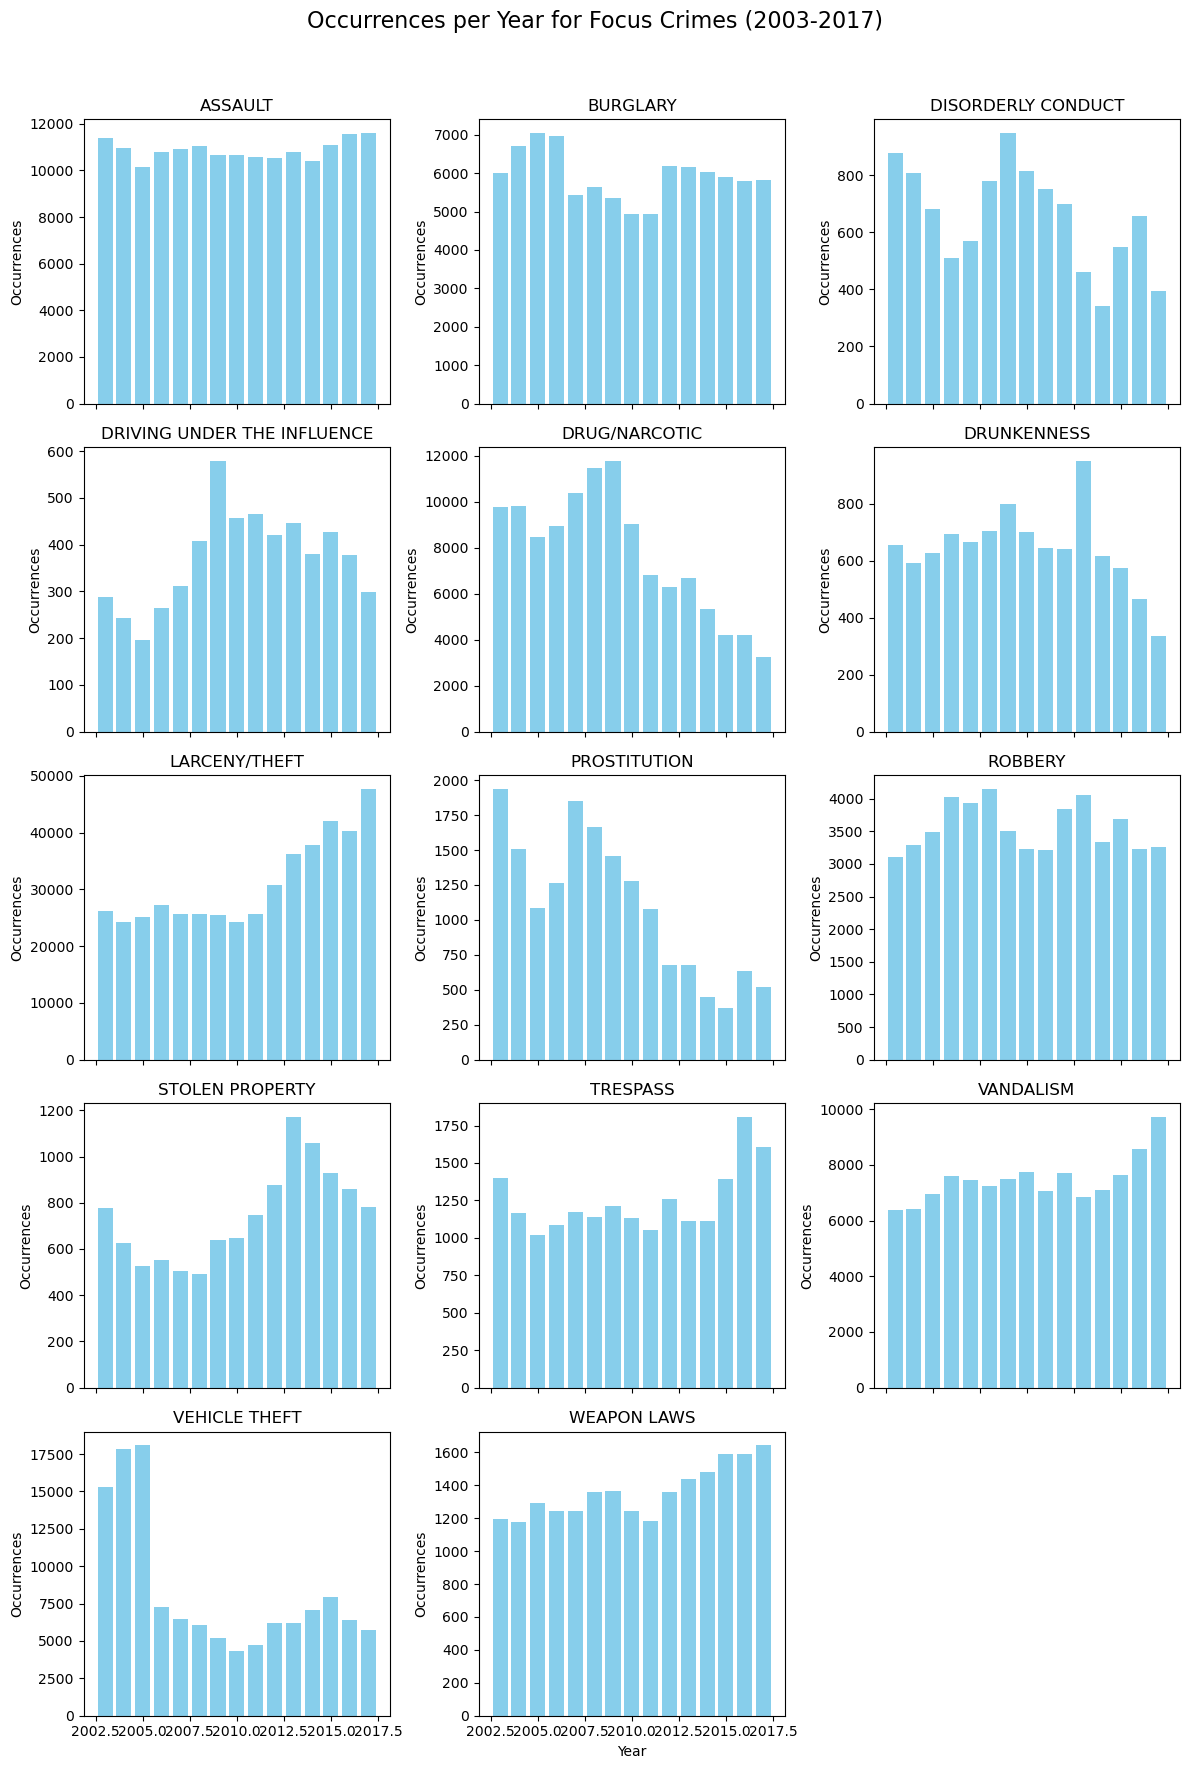

In [1]:
%run Week1.ipynb

In [2]:
import utils
import pandas as pd
from math import radians, cos, sin, asin, sqrt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Week 5
## Part 1: Exploratory data visualzation, two variables

### Exercise: Questions from DAOST Chapter 3
* ***Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?***
There is a clear relationship between the two variables. If it would have been more noisy it would have looked more messy and it would be difficult to see a pattern.
* ***Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?***
This is a though example. One wants to see the relationship between 
* ***What are the two methods Janert metions for smoothing noisy data? Can you think of other ones?***
Weighted splines and Loess.
The first one uses piecewise polynomial functions and has an overall smoothening goal.
The latter is more responsive to local variations in the data. It typically uses linear regression by locally weighting the datapoints closest to the point of interest contribute more strongly. This method is however computationally intensive.<br>Some other examples:<br>
Mooving average: Good for time series as it can help highlighting the overall trend rather than short term variations.

* ***What are residuals? Why is it a good idea to plot the residuals of your fit?***
The residuals are the remainder when the smoothening has been subtracted. These should be symmetrically balanced around zero

* ***Explain in your own words the point of the smooth tube in figure 3-7.***
It is to tell that the majority of data points will lie between the upper and the lower curve. This is the confidence interval.

* ***What the h#ll is banking and what part of our visual system does it use to help us see patterns? What are potential problems with banking?***
As it is easiest to interpret plots if they are as near at 45° banking tries to adjust the aspect ratio so that the slopes get as near 45° as possible.
Problems: It can be taken too litterally and plots can become unreadable if banking is forced through. As the example in the book, the plot becomes so small, that it becomes difficult to interpret.

* ***Summarize the discussion of Graphical Analysis and Presentation Graphics on pp. 68-69 in your own words.***

### Exercise 2.2: Logarithms and logarithmic plots.

- First, a couple of questions:
    - What kind of relationships will a semi-log plot help you discover? First think, use your brain to answer, then it's OK to get further inspiration from your LLM. The same goes for the next little question.
    Problems with huge differences on the x-axis as it was shown with the whale example in the book.
    In general exponential growth and decay can be more easily interpreted if if becomes a straight line.
    - What kind of functions will loglog plots help you see?
    Exponential functions.

- Second, create a version of this plot from Week 1, where you display the y-axis on log-scale. Comment on what the plot looks like. Do any new insights arise?


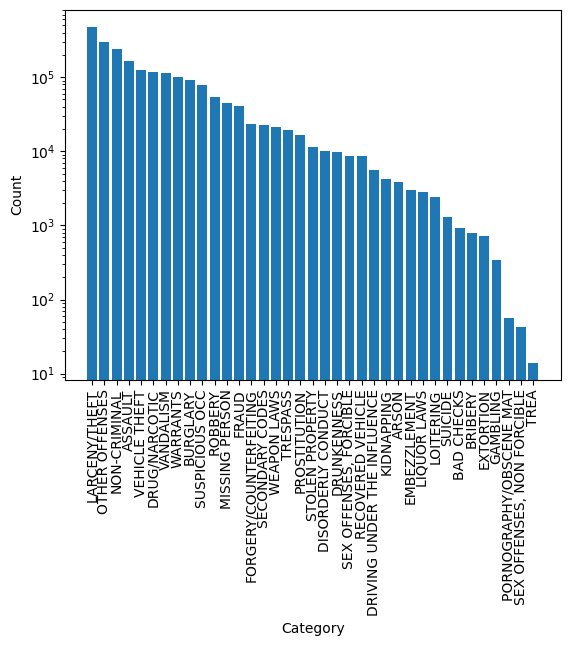

In [3]:
counts = data.Category.value_counts()

plt.bar(counts.index, counts)
plt.yscale('log')

# Label the axes
plt.xlabel('Category')
plt.xticks(rotation = 90)
plt.ylabel('Count')

# Show the plot
plt.show()

***Step 2: Count the number of thefts occurring within each grid-square (use all data for all time).***

In [4]:
data = data[(data.Y < 50) & (data.X<-122)]
data['Category'].unique()

array(['ROBBERY', 'ARSON', 'ASSAULT', 'VEHICLE THEFT', 'BURGLARY',
       'LARCENY/THEFT', 'WARRANTS', 'OTHER OFFENSES', 'TRESPASS',
       'DRUG/NARCOTIC', 'SUSPICIOUS OCC', 'LIQUOR LAWS', 'VANDALISM',
       'WEAPON LAWS', 'NON-CRIMINAL', 'MISSING PERSON', 'FRAUD',
       'SEX OFFENSES, FORCIBLE', 'SECONDARY CODES', 'DISORDERLY CONDUCT',
       'RECOVERED VEHICLE', 'KIDNAPPING', 'FORGERY/COUNTERFEITING',
       'PROSTITUTION', 'DRUNKENNESS', 'BAD CHECKS',
       'DRIVING UNDER THE INFLUENCE', 'LOITERING', 'STOLEN PROPERTY',
       'SUICIDE', 'BRIBERY', 'EXTORTION', 'EMBEZZLEMENT', 'GAMBLING',
       'PORNOGRAPHY/OBSCENE MAT', 'SEX OFFENSES, NON FORCIBLE', 'TREA'],
      dtype=object)

In [5]:
theft_mask = ['VEHICLE THEFT', 'LARCENY/THEFT']
theft_data = data[data['Category'].isin(theft_mask)]

In [6]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [7]:
lat_min = theft_data.Y.min()
lat_max = theft_data.Y.max()
lon_min = theft_data.X.min()
lon_max = theft_data.X.max()

In [8]:
print(f"Estimated bin amount along the western border of San Fransisco: {haversine(lon_min, lat_min, lon_min, lat_max)*10}") 
print(f"Estimated bin amount along the eastern border of San Fransisco: {haversine(lon_max, lat_min, lon_max, lat_max)*10}")

Estimated bin amount along the western border of San Fransisco: 125.31766140931124
Estimated bin amount along the eastern border of San Fransisco: 125.31766140931124


In [9]:
print(f"Estimated bin amount along the northern border of San Fransisco: {haversine(lon_min, lat_max, lon_max, lat_max)*10}")
print(f"Estimated bin amount along the southern border of San Fransisco: {haversine(lon_min, lat_min, lon_max, lat_min)*10}")

Estimated bin amount along the northern border of San Fransisco: 130.78123566673807
Estimated bin amount along the southern border of San Fransisco: 130.98067206895638


In [10]:
count, lon, lat = np.histogram2d(theft_data.Y, theft_data.X, bins = [130,125])

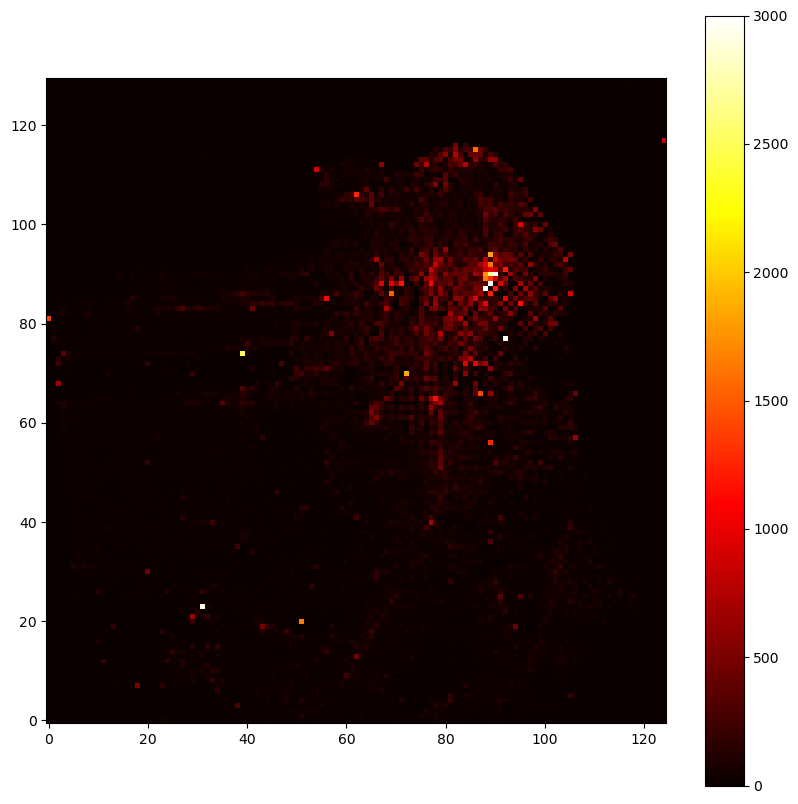

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(count, cmap='hot',vmax=3000, origin='lower')
plt.colorbar()

The 

In [12]:
count_tally = np.zeros(int(count.max()))
for i in range(0,int(count.max())):
    count_tally[i]= np.sum(count == i)

In [13]:
count_tally[2]

151.0

In [14]:
count.max()

17456.0

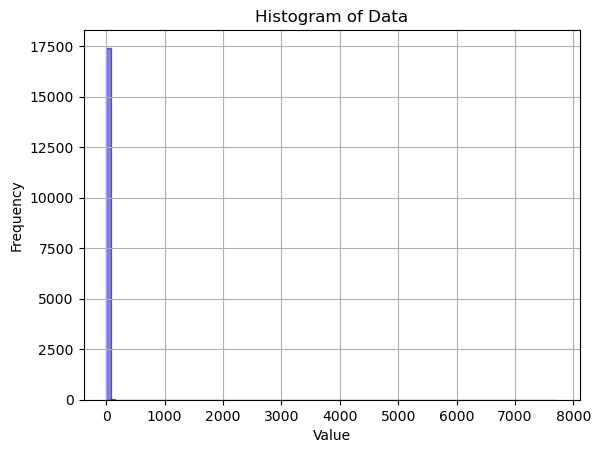

In [15]:
#hist, bins = np.histogram(count_tally, bins=count_tally)  # Compute histogram with 20 bins

# Plot histogram
plt.hist(count_tally, bins=100, alpha=0.5, color='b', edgecolor='black')  # Plot histogram bars
plt.xlabel('Value')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.title('Histogram of Data')  # Title of the plot
plt.grid(True)  # Add gridlines to the plot
plt.show() 

In [16]:
hist, bins = np.histogram(count_tally, bins=500)
bins = bins[1:]

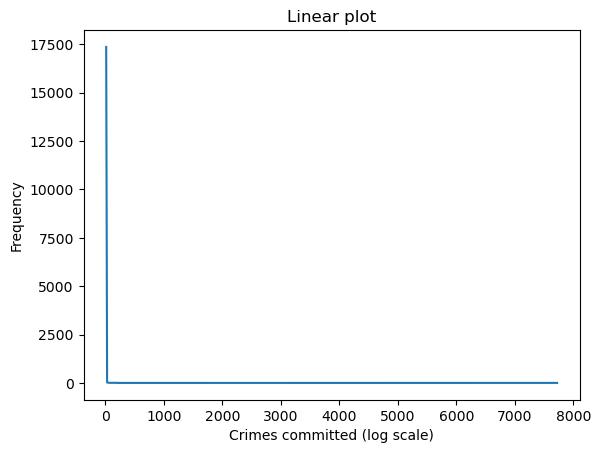

In [17]:
plt.plot(bins, hist,linestyle='-')

plt.xlabel('Crimes committed (log scale)')
plt.ylabel('Frequency')
plt.title('Linear plot')

# Show the plot
plt.show()

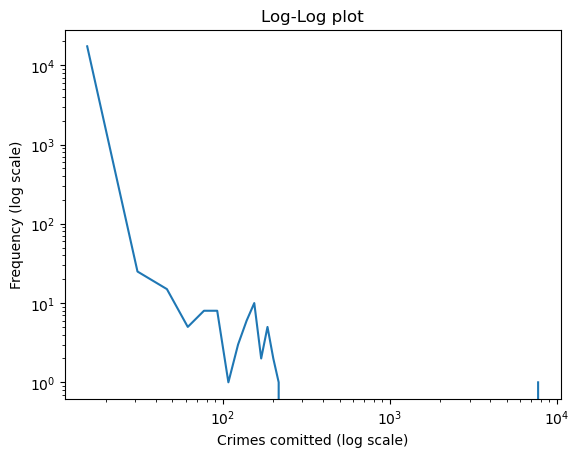

In [18]:
plt.plot(bins, hist,linestyle='-')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Crimes comitted (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Log-Log plot')

# Show the plot
plt.show()

## Part 2: Linear Regression

In [19]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

Display the plots in a 7 by 13 subplot matrix. You can use matplotlib's subplot to organize those plots. With 7 across and 13 down, you should be able to squeeze them all onto a single a4 page.

In [20]:
data = data[data['Category'].isin(focuscrimes)]

In [21]:
data

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Year
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,2004-11-22,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,2010-11-21,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0,2010
5,13027069804134,130270698,4134,ASSAULT,BATTERY,Tuesday,2013-04-02,15:50,TARAVAL,NONE,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,44.0,2013
6,17063991304134,170639913,4134,ASSAULT,BATTERY,Sunday,2017-08-06,18:15,SOUTHERN,NONE,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0,2017
7,16020415607020,160204156,7020,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,Thursday,2016-03-03,19:30,TARAVAL,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129515,17080890805011,170808908,5011,BURGLARY,"BURGLARY OF APARTMENT HOUSE, FORCIBLE ENTRY",Monday,2017-10-02,21:00,SOUTHERN,NONE,...,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,32.0,2017
2129517,16026805516710,160268055,16710,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Friday,2016-04-01,10:36,NORTHERN,"ARREST, BOOKED",...,NaN,NaN,10.0,2.0,NaN,NaN,NaN,NaN,50.0,2016
2129520,17050730416710,170507304,16710,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Thursday,2017-06-22,01:42,CENTRAL,"ARREST, CITED",...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,77.0,2017
2129521,17071435504014,170714355,4014,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,2017-09-01,17:00,PARK,NONE,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,112.0,2017


In [22]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M')
#Adding a new column for the hour only:
data['hour_of_day'] = data['Time'].dt.hour
#Add one for hour of the week
data['Hour_of_week'] = data['Date'].dt.dayofweek * 24 + data['hour_of_day']
#And combined with focuscrimes:
weekhour_crimes = data.groupby(['Hour_of_week', 'Category']).size().unstack()

/var/folders/jp/dc7lqd6n2jj4xgt9r_fd31440000gn/T/ipykernel_49850/3835204817.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cols, num_rows, subplot_index[k])


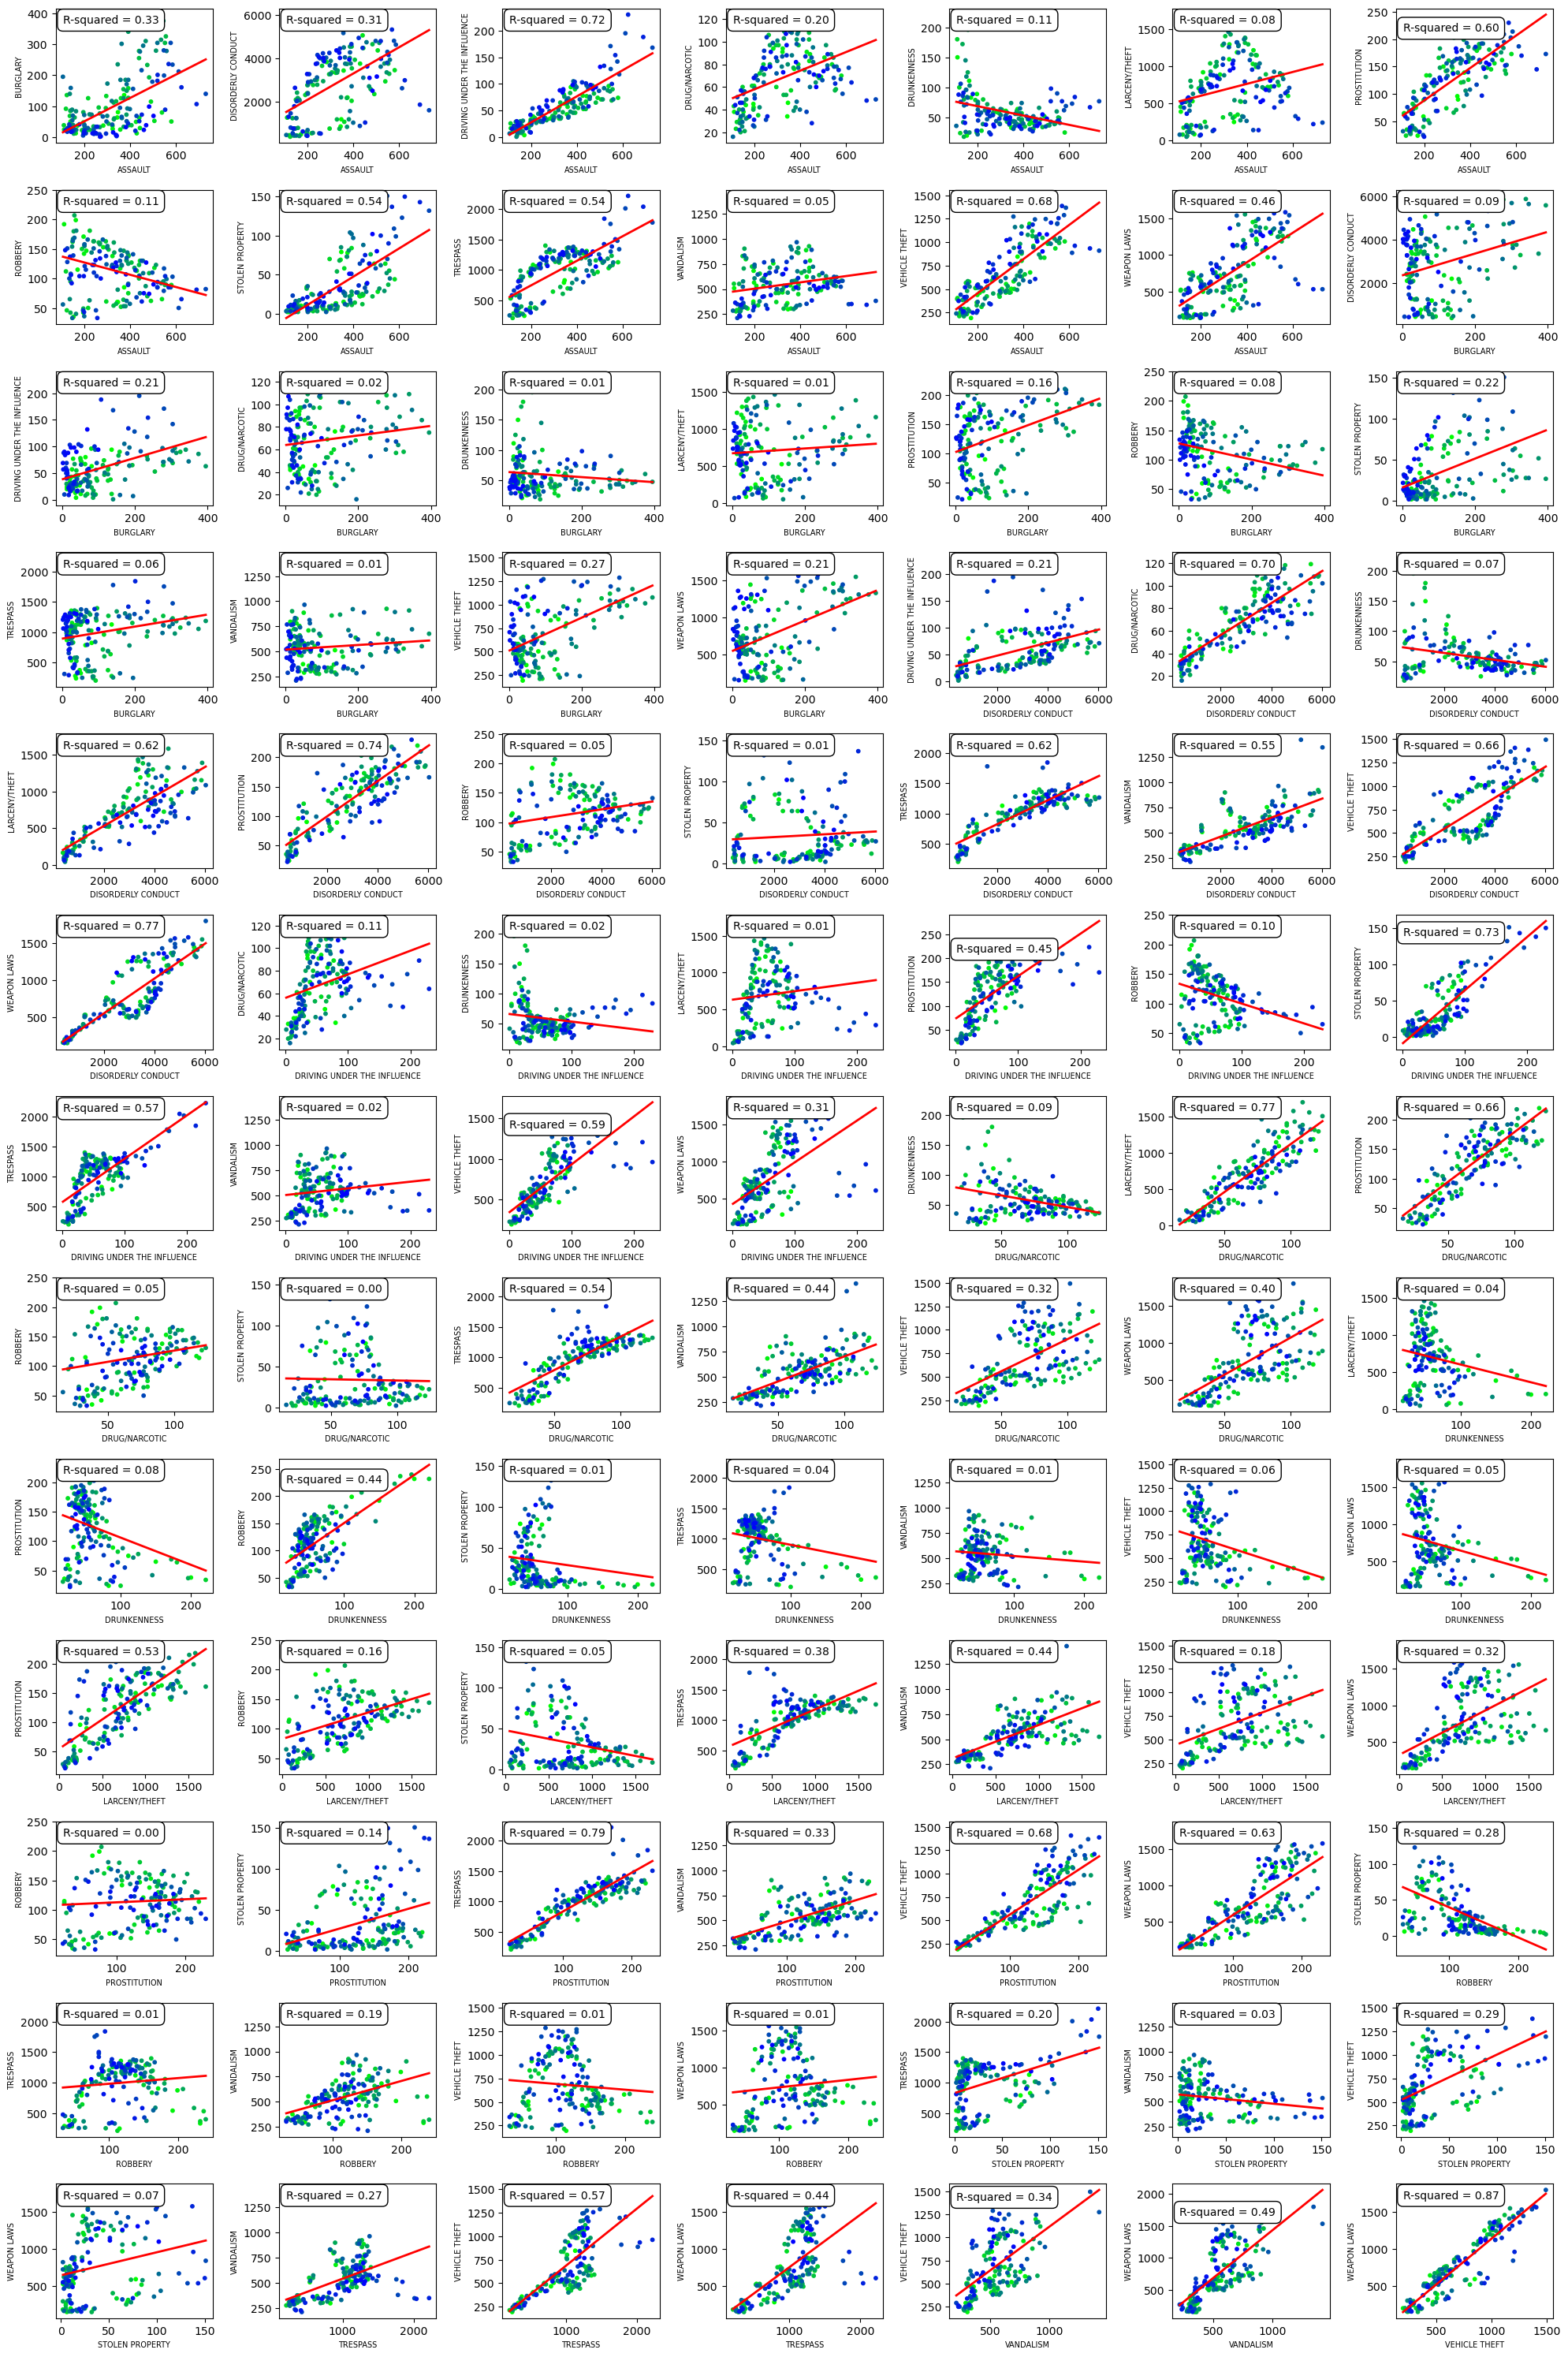

In [24]:
#Array for subplot locations
subplot_index = np.arange(1, 92)
R_arr = np.zeros(91)

k = 0;
num_rows, num_cols = 7, 13

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 30))

colors = [(0, 1, 0), (0, 0, 1)]# Red to blue
cmap_name = 'red_blue'
n_bins = 168  # Number of bins for the colormap
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

for i in range(len(focuscrimes)):
    for j in range(len(focuscrimes)): 
        if j > i:
            # Plot the scatter plot
            plt.subplot(num_cols, num_rows, subplot_index[k])
            plt.scatter(weekhour_crimes[list(focuscrimes)[i]], weekhour_crimes[list(focuscrimes)[j]], c=np.arange(168), cmap=cmap, s=10)
             
            #Linear function
            x = weekhour_crimes[list(focuscrimes)[i]]
            meanx = x.mean()
            
            y = weekhour_crimes[list(focuscrimes)[j]]
            meany = y.mean()
            
            a = (((x-meanx)*(y-meany)).sum())/((x-meanx)*(x-meanx)).sum()
            b = meany - a * meanx
            
            x_values = np.linspace(x.min(), x.max(), 100)
            y_values = a * x_values + b
            
            plt.plot(x_values, y_values, color='red', linewidth=2) 
            
             # Set labels
            plt.xlabel(weekhour_crimes.columns[i], fontsize=7)
            plt.ylabel(weekhour_crimes.columns[j], fontsize=7)
            
            #R-squared
            SST = ((y-meany)*(y-meany)).sum()
            SSR = ((a*x+b-meany)*(a*x+b-meany)).sum()
            R = SSR/SST
            R_arr[k] = R
            
            
            plt.text(np.min(x), np.max(y), f'R-squared = {R:.2f}', ha='left', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
            
            k += 1
    

#plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
1-SSR/SST

In [ ]:
# Assuming weekhour_crimes contains your data
# Extract the two crime variables for the scatter plot
crime1 = weekhour_crimes[list(focuscrimes)[0]].values.reshape(-1, 1)  # Reshape to 2D array
crime2 = weekhour_crimes[list(focuscrimes)[1]].values

# Fit a linear regression model
model = LinearRegression()
model.fit(crime1, crime2)

slope = model.coef_[0]
intercept = model.intercept_

# Predict the y-values using the fitted line
predicted_crime2 = model.predict(crime1)

# Plot the scatter plot
plt.scatter(crime1, crime2, label='Original data')

# Plot the linear regression line
plt.plot(crime1, predicted_crime2, color='red', label='Fitted line')
plt.text(np.min(crime1), np.max(crime2), f'R-squared = {r_squared:.2f}', ha='left', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Add labels and legend
plt.xlabel(weekhour_crimes.columns[0])
plt.ylabel(weekhour_crimes.columns[1])
plt.title('Linear Regression for Crime 1 vs Crime 2')
plt.legend()

# Show plot
plt.show()

In [ ]:
print("Slope:", slope)
print("Intercept:", intercept)

In [ ]:
r_squared = model.score(crime1, crime2)
print("R-squared:", r_squared)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

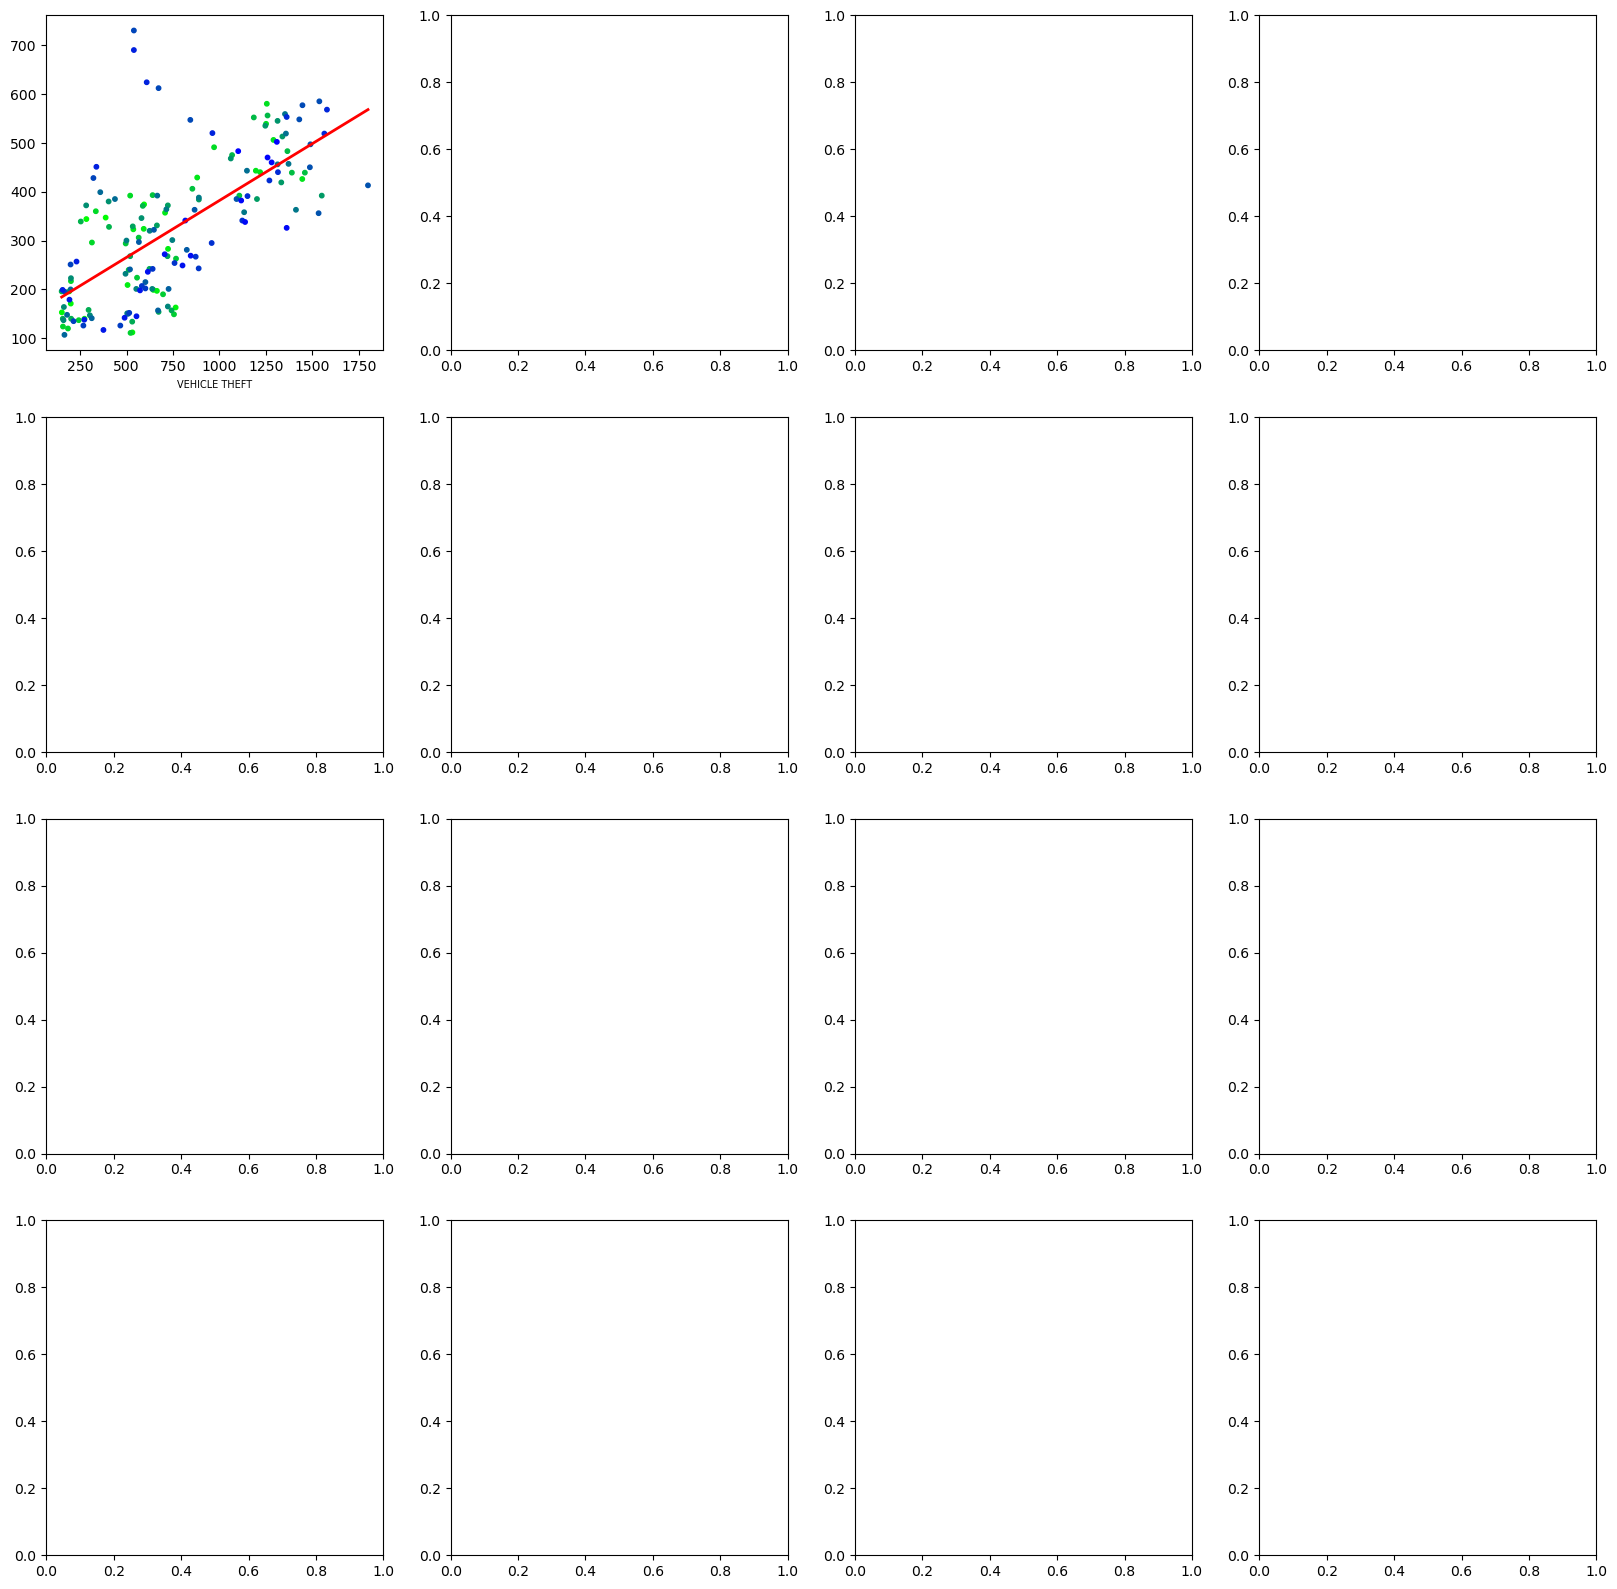

In [72]:
num_rows, num_cols = 4, 4

subplot_index = np.arange(1, 15)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

colors = [(0, 1, 0), (0, 0, 1)]# Red to blue
cmap_name = 'red_blue'
n_bins = 168  # Number of bins for the colormap
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

for i in range(0,len(focuscrimes)):
    # Plot the scatter plot
    plt.subplot(num_cols, num_rows, subplot_index[i])
    plt.scatter(weekhour_crimes['VEHICLE THEFT'], weekhour_crimes[list(focuscrimes)[i]], c=np.arange(168), cmap=cmap, s=10)

    #Linear function
    x = weekhour_crimes['VEHICLE THEFT']
    meanx = x.mean()

    y = weekhour_crimes[list(focuscrimes)[i]]
    meany = y.mean()

    a = (((x-meanx)*(y-meany)).sum())/((x-meanx)*(x-meanx)).sum()
    b = meany - a * meanx

    x_values = np.linspace(x.min(), x.max(), 100)
    y_values = a * x_values + b

    plt.plot(x_values, y_values, color='red', linewidth=2) 

     # Set labels
    plt.xlabel('VEHICLE THEFT', fontsize=7)
    plt.ylabel(weekhour_crimes[list(focuscrimes)[i]], fontsize=7)

    #R-squared
    SST = ((y-meany)*(y-meany)).sum()
    SSR = ((a*x+b-meany)*(a*x+b-meany)).sum()
    R = SSR/SST
    R_arr[i+1] = R

    plt.text(np.min(x), np.max(y), f'R-squared = {R:.2f}', ha='left', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


#plt.legend()
plt.tight_layout()
plt.show()

In [25]:
focuscrimes

{'ASSAULT',
 'BURGLARY',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'DRUG/NARCOTIC',
 'DRUNKENNESS',
 'LARCENY/THEFT',
 'PROSTITUTION',
 'ROBBERY',
 'STOLEN PROPERTY',
 'TRESPASS',
 'VANDALISM',
 'VEHICLE THEFT',
 'WEAPON LAWS'}

In [35]:
weekhour_crimes

Category,ASSAULT,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,TRESPASS,VANDALISM,VEHICLE THEFT,WEAPON LAWS
Hour_of_week,,,,,,,,,,,,,,
0,1130,514,64,78,522,94,2193,136,374,76,85,846,594,139
1,827,299,33,79,321,63,1183,81,347,46,60,504,387,90
2,789,359,42,69,246,80,852,64,344,34,60,467,283,96
3,378,375,25,34,177,27,590,48,196,45,42,358,191,59
4,284,338,20,6,154,13,435,36,153,38,35,234,151,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1315,517,35,51,670,98,3949,33,382,82,107,945,1117,158
164,1254,531,36,39,518,98,3629,24,460,71,75,1008,1281,146
165,1301,493,40,64,538,90,3100,39,470,60,127,1085,1259,157


In [43]:
weekhour_crimes['VEHICLE THEFT'].max()

1800

In [65]:
weekhour_crimes[list(focuscrimes)[2]]

Hour_of_week
0      2193
1      1183
2       852
3       590
4       435
       ... 
163    3949
164    3629
165    3100
166    3161
167    2506
Name: LARCENY/THEFT, Length: 168, dtype: int64

In [70]:
focuscrimes[1]

TypeError: 'set' object is not subscriptable

In [67]:
focuscrimes

{'ASSAULT',
 'BURGLARY',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'DRUG/NARCOTIC',
 'DRUNKENNESS',
 'LARCENY/THEFT',
 'PROSTITUTION',
 'ROBBERY',
 'STOLEN PROPERTY',
 'TRESPASS',
 'VANDALISM',
 'VEHICLE THEFT',
 'WEAPON LAWS'}